# Test case for Kistler dynamic contact angle model

## Droplet spreading with an equilibrium contact angle of $41$°
 
The notebook shows the wetted area plot and the experimental curve from Lavi and Marmur experiments for Squalane droplet with $\theta_e = 41$°.

/home/asghar/ma11kuba/OpenFOAM-cases/b01-wetting-benchmark-v2212/src/boundaryConditions/kistler/testCases/dropletSpreading/postProcessing/wettedArea.csv


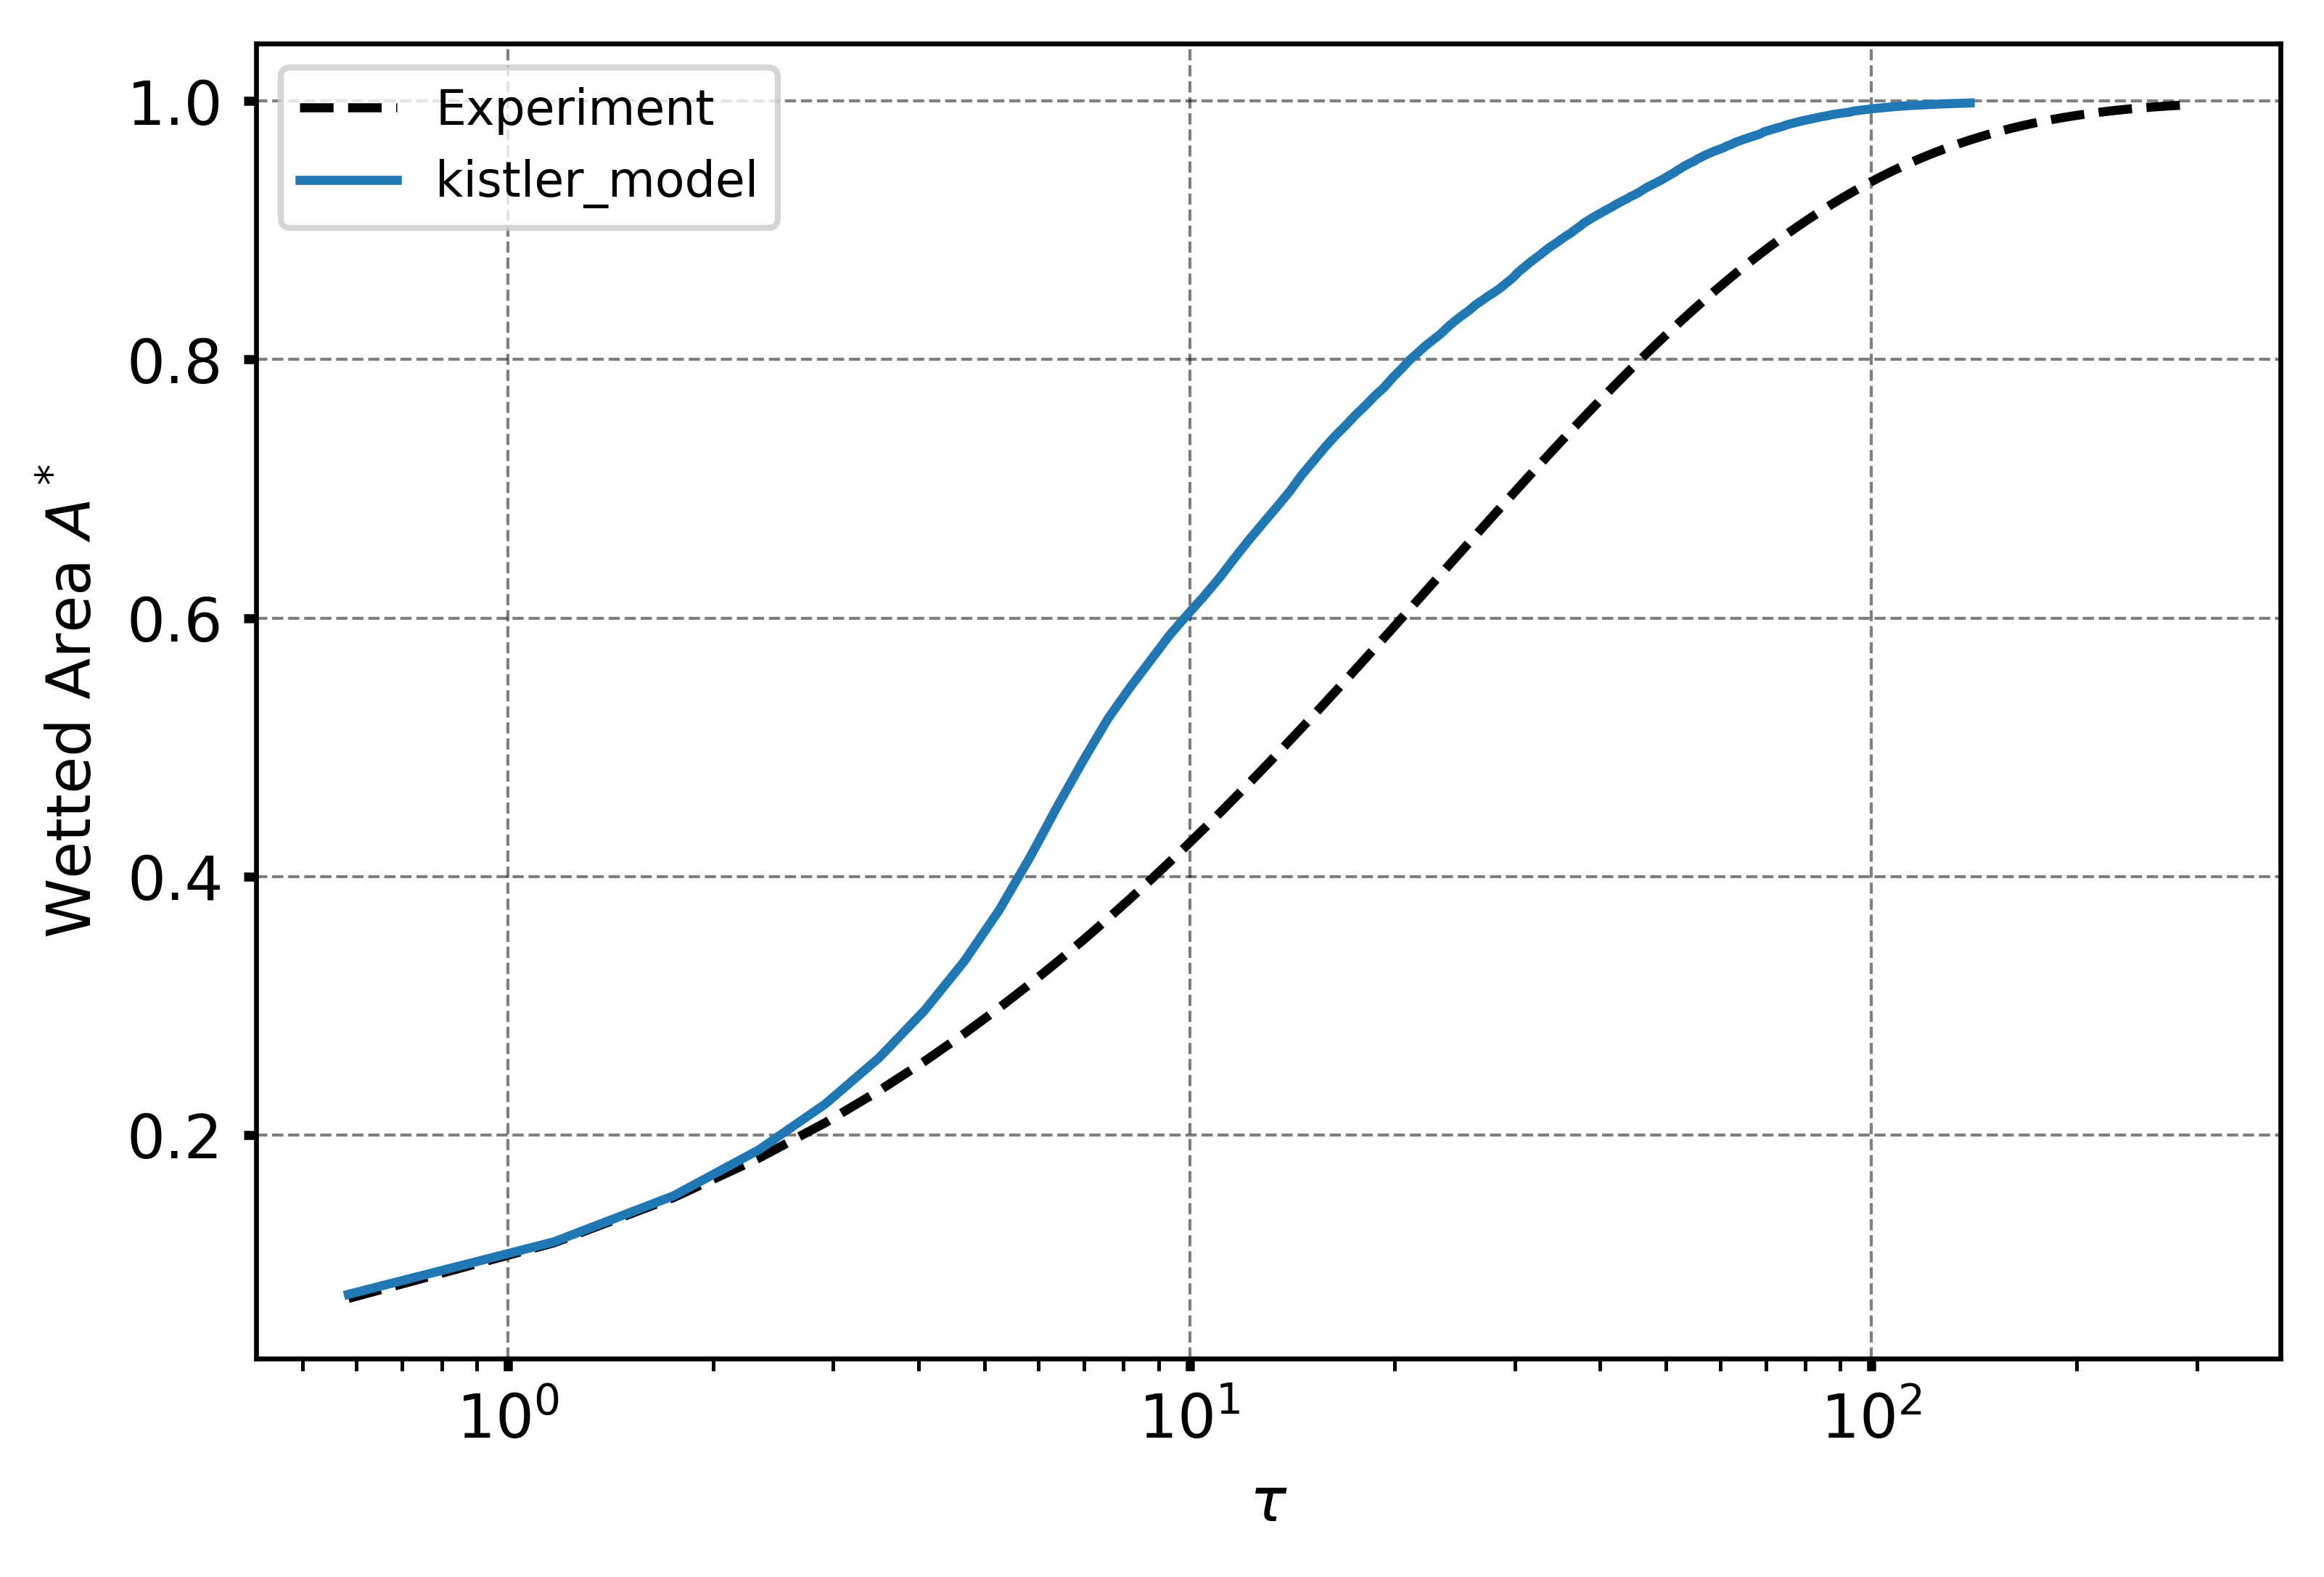

In [2]:
#Wetted Area 
#Loading the necessary files
import pandas as pd
import numpy as np
from vtk import vtkStructuredPointsReader
from vtk.util import numpy_support as VN
import csv
import sys
# for radians
import math
import os
import matplotlib.pyplot as plt
import re
import itertools
from matplotlib import rcParams
pi = np.pi
sin = np.sin
cos = np.cos

#plt.figure(figsize=(4, 3))
rcParams["figure.dpi"] = 600
fontSize = 10

# Given experimental constants for dynamics
K = 0.471
n = 0.699
R_0 = 1e-3  # meters

# Liquid properties
sigma = 32e-3
mu = 34e-3
# Calculating the volume of the sphere
V = 4.1887902047863908955e-09 # considering droplet of 1mm R0
factor = 4.49 # A_f/V^(2/3)
#A_f = factor * V**(2/3)
#Final area
Af = 1.10218e-05
# Time range
t = np.linspace(0.001, 0.5, 500)
tau_0 = 0
# Calculating dimesionless time tau 
tau = (sigma * t) / (mu * V**(1/3)) +tau_0

# Relation from Lavi and Marmur paper
# Calculating dimensionless area A/A_f
A_Af = (1 - np.exp(-K * (tau**n) / (Af / V**(2/3))))
plt.plot(tau, A_Af, label="Experiment",ls='dashed', linewidth=1.5, color='black')
#theta = np.radians(contactAngle)
#print(A_Af[0], tau[0])
#######################################################################################

cwd = os.getcwd()
wettedAreaFile =cwd + '/postProcessing/wettedArea.csv'
print (wettedAreaFile)

pd.set_option('display.float_format', lambda x: '%.1f' % x)
# Read the CSV file without headers
df = pd.read_csv(wettedAreaFile, header=None)

# Multiply the second column by 1e-6
df.iloc[:, 1] *= (1e-6/Af) # normalizing the area
t_x = (sigma * df.iloc[:, 0]) / (mu * V**(1/3)) +tau_0
plt.plot(t_x, df.iloc[:, 1], label=r'kistler_model', linewidth=1.5, ls='solid')
plt.grid(visible=True, which='major', linestyle= 'dashed',color='black', alpha=0.5, lw=0.5)
plt.tick_params(axis='both', direction='out', length=2, width=1.5,  grid_color='black', grid_alpha=0.5)
plt.xlabel(r"$\tau$" ,color='black',fontsize=fontSize)
plt.ylabel(r"Wetted Area $A^*$",color='black',fontsize=fontSize)
# plt.legend(loc='lower center')
plt.xticks(size = fontSize)
plt.yticks(size = fontSize)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.xscale('log')
#plt.xlim([5e-1, 500])
#plt.ylim([0, 1])
### Generate the plot
plt.legend(fontsize=8, loc='upper left', ncol=1)   
#plt.savefig('squalane-zeta-study'+'.pdf', bbox_inches='tight')
#plt.savefig('squalane-zeta-study'+'.png', bbox_inches='tight')
plt.show()

